<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/uncertainWeightedFrequent/basic/WUFIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding  Weighted Uncertain Frequent Patterns in Uncertain Transational Databases using WUFIM

This tutorial has two parts. In the first part, we describe the basic approach to find Weighted Uncertain Frequent Patterns in a Uncertain Transactional database using the WUFIM algorithm. In the final part, we describe an advanced approach, where we evaluate the WUFIM algorithm on a dataset at different minimum expsupport threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [1]:
!pip install -U pami #install the pami repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.9/883.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.5 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=50ce8beb6e6e191567142d38d97589b4b82b8c10ed8ad5129f7ba114d3a05244
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=5e7a0e7c71687686ba0a3b16f7f14ae27e06dfb88927c494ba08f6323019e1ac
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


2.   Downloading a sample dataset

In [2]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/uncertainDatabases/uncertainTransaction_T10I4D100K.csv #download a sample uncertainTransactional database

--2023-11-16 15:22:46--  https://u-aizu.ac.jp/~udayrage/datasets/uncertainDatabases/uncertainTransaction_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9972382 (9.5M) [text/csv]
Saving to: ‘uncertainTransaction_T10I4D100K.csv’

uncertainTransactio 100%[===================>]   9.51M  5.01MB/s    in 1.9s    

2023-11-16 15:22:49 (5.01 MB/s) - ‘uncertainTransaction_T10I4D100K.csv’ saved [9972382/9972382]



3.   Printing few lines of a dataset to know its format.

In [3]:
!head -2 uncertainTransaction_T10I4D100K.csv

25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834:0.688	0.758	0.612	0.44	0.249	0.862	0.523	0.472	0.334	0.093	0.808	0.73	0.04	0.385	0.229	0.151 
39	120	124	205	401	581	704	814	825	834:0.524	0.817	0.512	0.652	0.872	0.713	0.834	0.756	0.816	0.49 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding  Weighted Uncertain Frequent Patterns using WUFIM

### Step 1: Understanding the statistics of a database to choose an appropriate minimum support (expSup) value.

In [4]:
#import the class file
import PAMI.extras.dbStats.UncertainTransactionalDatabase as stats

#specify the file name
inputFile = 'uncertainTransaction_T10I4D100K.csv'

#initialize the class
obj=stats.UncertainTransactionalDatabase(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 100000
Total number of items : 870
Database sparsity : 0.988388183908046
Minimum Transaction Size : 1
Average Transaction Size : 10.10228
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.66716768114031
Variance in Transaction Sizes : 13.448253284132841


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

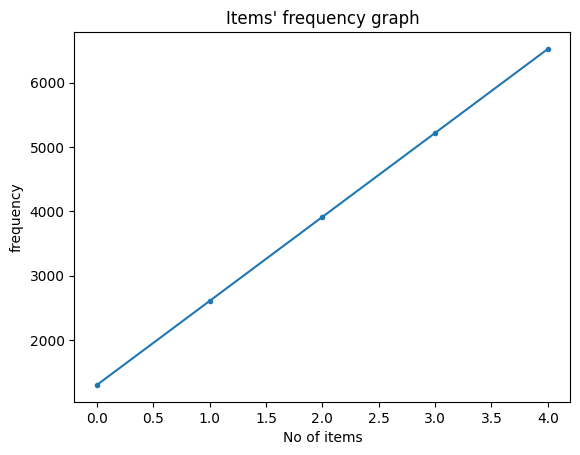

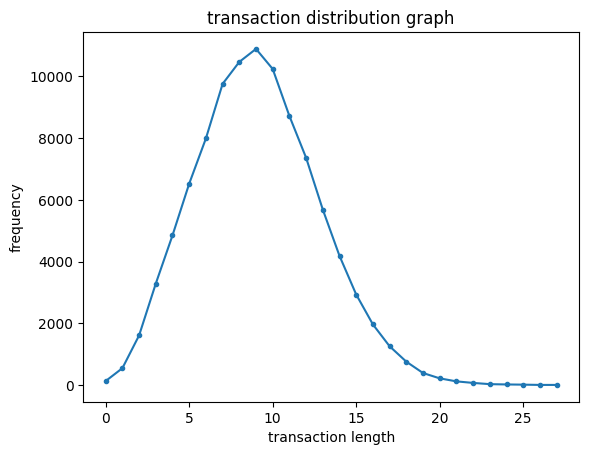

In [5]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minExpSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 300 (in count). We can increase or decrease the _minexpSup_ based on the number of patterns being generated.

In [6]:
weightFile = 'T10_weights.txt'
expSup = 300  # User can specify different expSup value
expWSup = 700     # User can specify different expWSup value
seperator = '\t'

### Step 4: Mining  Weighted Uncertain Frequent Patterns using WUFIM

In [8]:
from PAMI.weightedUncertainFrequentPattern.basic import WUFIM as alg #import the algorithm

obj = alg.WUFIM(iFile=inputFile, wFile=weightFile, expSup=expSup, expWSup=expWSup, sep=seperator) #initialize
obj.startMine()            #start the mining process

obj.save('periodicFrequentPatternsAtExSup300.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Weighted Frequent patterns were generated  successfully using basic algorithm
Total No of patterns: 632
Runtime: 42.11367893218994
Memory (RSS): 1172594688
Memory (USS): 1149542400


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _expSup_ value.

In [9]:
!head 'periodicFrequentPatternsAtExSup300.txt'

3	6	9:300.47 
0:301.5309999999999 
7	3	0:302.04799999999983 
4	0	8:302.0710000000001 
8	3	7:302.643 
2	4	9:307.3069999999998 
6	6	0:309.92600000000044 
8	3	3:313.02199999999993 
1	6	7:314.3760000000002 
9	0	5:314.4860000000001 


The storage format is: _periodicfrequentPattern:support_
***

## Part 2: Evaluating the WUFIM algorithm on a dataset at different expSup values

### Step 1: Import the libraries and specify the input parameters

In [17]:
from PAMI.weightedUncertainFrequentPattern.basic import WUFIM as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'uncertainTransaction_T10I4D100K.csv'
weightFile = 'T10_weights.txt'
seperator='\t'
expWSup = 700
minimumSupportCountList = [500, 1000, 1500, 2000, 2500]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of WUFIM

In [18]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of WUFIM algorithm

### Step 3: Execute the algorithm at different expSup values

In [19]:
for expSupCount in minimumSupportCountList:
    obj = alg.WUFIM(inputFile, weightFile, expSupCount, expWSup, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['WUFIM', expSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Weighted Frequent patterns were generated  successfully using basic algorithm
Weighted Frequent patterns were generated  successfully using basic algorithm
Weighted Frequent patterns were generated  successfully using basic algorithm
Weighted Frequent patterns were generated  successfully using basic algorithm
Weighted Frequent patterns were generated  successfully using basic algorithm


### Step 4: Print the Result

In [ ]:
print(result)

  algorithm  minSup  maximumPeriodCount  patterns    runtime     memory
0     PFPMC    3000                4000        60  96.989232  502587392
1     PFPMC    3500                4000        40  59.217767  422608896
2     PFPMC    4000                4000        26  41.785200  365383680
3     PFPMC    4500                4000        17  33.114026  328404992
4     PFPMC    5000                4000        10  29.964159  299024384


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

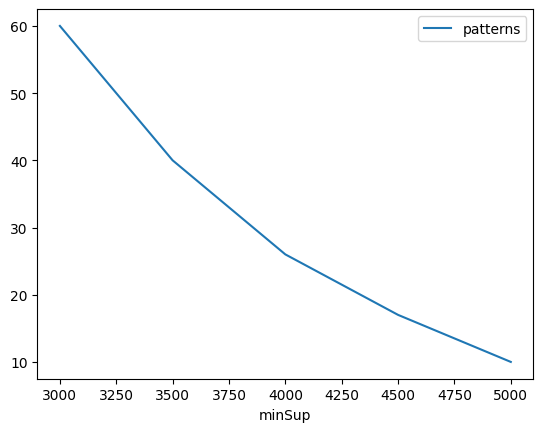

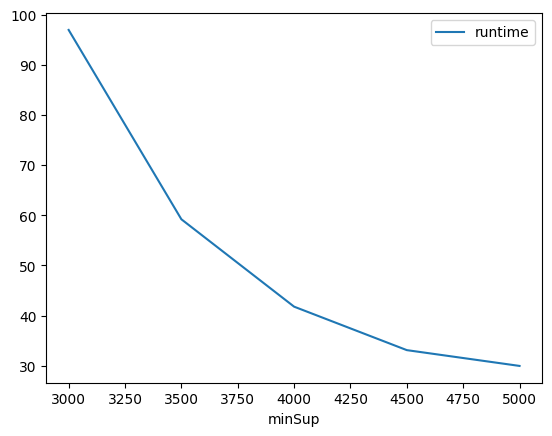

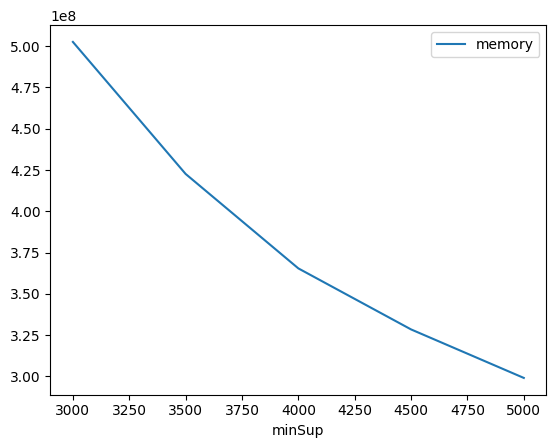

In [ ]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib